In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
# general libraries
import time
import numpy as np
import matplotlib.pyplot as matplt
# my own modules
import sys
sys.path.append('../skrmt')

In [54]:
def _build_m_labels(M):
    labels = []
    for m in M:
        labels.append("m = "+str(m))
    return labels

# Histogram using tridiagonal form vs standard form

## Gaussian Ensemble (GOE)

In [9]:
from ensemble import GaussianEnsemble

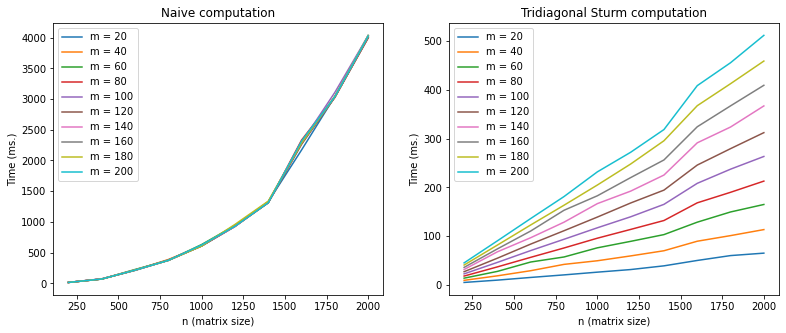

In [14]:
interval = (-2,2)
to_norm = False

N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

times_naive = np.zeros((len(N), len(M)))
times_tridiag = np.zeros((len(N), len(M)))

interval = (-2, 2)

nreps = 20

for (i, n) in enumerate(N):
    for (j, m) in enumerate(M):
        for k in range(nreps):
            goe1 = GaussianEnsemble(beta=1, n=n, use_tridiagonal=False)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe1.eigval_hist(bins=m, interval=interval, density=to_norm)
            t2 = time.time()
            times_naive[i][j] += (t2 - t1)*1000 # ms

            goe2 = GaussianEnsemble(beta=1, n=n, use_tridiagonal=True)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe2.eigval_hist(bins=m, interval=interval, density=to_norm)
            t2 = time.time()
            times_tridiag[i][j] += (t2 - t1)*1000 # ms
    
        times_naive[i][j] /= nreps
        times_tridiag[i][j] /= nreps

fig, axes = matplt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.subplots_adjust(hspace=.5)

labels = _build_m_labels(M)

lines = axes[0].plot(N, times_naive)
axes[0].legend(lines, labels)
axes[0].set_title('Naive computation')
axes[0].set_xlabel('n (matrix size)')
axes[0].set_ylabel('Time (ms.)')

lines = axes[1].plot(N, times_tridiag)
axes[1].legend(lines, labels)
axes[1].set_title('Tridiagonal Sturm computation')
axes[1].set_xlabel('n (matrix size)')
_ = axes[1].set_ylabel('Time (ms.)')

## Wishart Ensemble (WRE)

In [10]:
from ensemble import WishartEnsemble

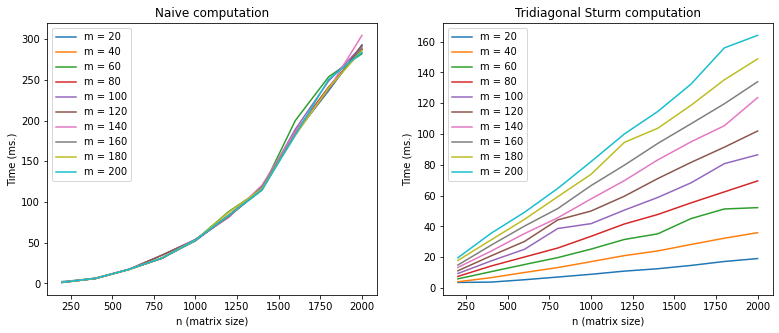

In [15]:
interval = (0,200)
to_norm = False

N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

times_naive = np.zeros((len(N), len(M)))
times_tridiag = np.zeros((len(N), len(M)))

interval = (-2, 2)

nreps = 20

for (i, n) in enumerate(N):
    for (j, m) in enumerate(M):
        for k in range(nreps):
            wre1 = WishartEnsemble(beta=1, p=int(n/3), n=n, use_tridiagonal=False)
            t1 = time.time()
            eig_hist_nt, bins_nt = wre1.eigval_hist(bins=m, interval=interval, density=to_norm)
            t2 = time.time()
            times_naive[i][j] += (t2 - t1)*1000 # ms

            wre2 = WishartEnsemble(beta=1, p=int(n/3), n=n, use_tridiagonal=True)
            t1 = time.time()
            eig_hist_nt, bins_nt = wre2.eigval_hist(bins=m, interval=interval, density=to_norm)
            t2 = time.time()
            times_tridiag[i][j] += (t2 - t1)*1000 # ms
    
        times_naive[i][j] /= nreps
        times_tridiag[i][j] /= nreps

fig, axes = matplt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.subplots_adjust(hspace=.5)

labels = _build_m_labels(M)

lines = axes[0].plot(N, times_naive)
axes[0].legend(lines, labels)
axes[0].set_title('Naive computation')
axes[0].set_xlabel('n (matrix size)')
axes[0].set_ylabel('Time (ms.)')

lines = axes[1].plot(N, times_tridiag)
axes[1].legend(lines, labels)
axes[1].set_title('Tridiagonal Sturm computation')
axes[1].set_xlabel('n (matrix size)')
_ = axes[1].set_ylabel('Time (ms.)')

# Histograms with polyfit

In [57]:
from ensemble import GaussianEnsemble

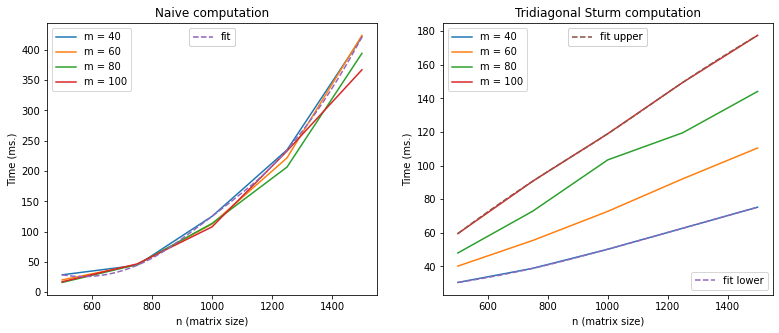

In [87]:
from scipy.interpolate import make_interp_spline

interval = (-2,2)
to_norm = False

N = [500, 750, 1000, 1250, 1500]
M = [40, 60, 80, 100]

times_naive = np.zeros((len(N), len(M)))
times_tridiag = np.zeros((len(N), len(M)))

interval = (-2, 2)

nreps = 2

for (i, n) in enumerate(N):
    for (j, m) in enumerate(M):
        for k in range(nreps):
            goe1 = GaussianEnsemble(beta=1, n=n, use_tridiagonal=False)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe1.eigval_hist(bins=m, interval=interval, density=to_norm)
            t2 = time.time()
            times_naive[i][j] += (t2 - t1)*1000 # ms

            goe2 = GaussianEnsemble(beta=1, n=n, use_tridiagonal=True)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe2.eigval_hist(bins=m, interval=interval, density=to_norm)
            t2 = time.time()
            times_tridiag[i][j] += (t2 - t1)*1000 # ms
    
        times_naive[i][j] /= nreps
        times_tridiag[i][j] /= nreps

fig, axes = matplt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.subplots_adjust(hspace=.5)

labels = _build_m_labels(M)
nodes = np.linspace(N[0], N[-1], 1000)

# fitting line naive computation
y_naive = times_naive[:,0]
spl = make_interp_spline(N, y_naive, k=2)
y_smooth_naive = spl(nodes)

# fitting line tridiagonal computational (smallest bin)
y_tridiag_low = times_tridiag[:,0]
spl = make_interp_spline(N, y_tridiag_low, k=2)
y_smooth_tridiag_low = spl(nodes)

# fitting line tridiagonal computational (largest bin)
y_tridiag_up = times_tridiag[:,-1]
spl = make_interp_spline(N, y_tridiag_up, k=2)
y_smooth_tridiag_up = spl(nodes)

# Naive plot
lines = axes[0].plot(N, times_naive)
fit_line = axes[0].plot(nodes, y_smooth_naive, '--')
legend1 = axes[0].legend(lines, labels, loc=0)
legend2 = axes[0].legend(fit_line, ['fit'], loc=9)
axes[0].add_artist(legend1)
axes[0].add_artist(legend2)
axes[0].set_title('Naive computation')
axes[0].set_xlabel('n (matrix size)')
axes[0].set_ylabel('Time (ms.)')

# Tridiag plot
lines = axes[1].plot(N, times_tridiag)
fit_line1 = axes[1].plot(nodes, y_smooth_tridiag_low, '--')
fit_line2 = axes[1].plot(nodes, y_smooth_tridiag_up, '--')
legend1 = axes[1].legend(lines, labels, loc=0)
legend2 = axes[1].legend(fit_line1, ['fit lower'], loc=4)
legend3 = axes[1].legend(fit_line2, ['fit upper'], loc=9)
axes[1].add_artist(legend1)
axes[1].add_artist(legend2)
axes[1].add_artist(legend3)
axes[1].set_title('Tridiagonal Sturm computation')
axes[1].set_xlabel('n (matrix size)')
_ = axes[1].set_ylabel('Time (ms.)')

# Importing simulation from utils file

In [109]:
from tutorial_utils import gaussian_tridiagonal_sim, wishart_tridiagonal_sim

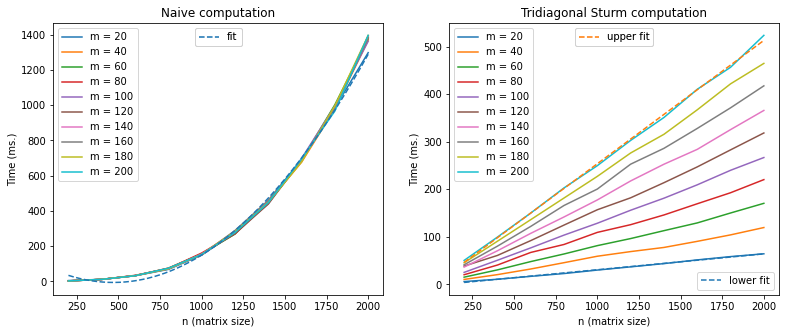

In [124]:
N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

gaussian_tridiagonal_sim(N_list=N, bins_list=M, nreps=50)

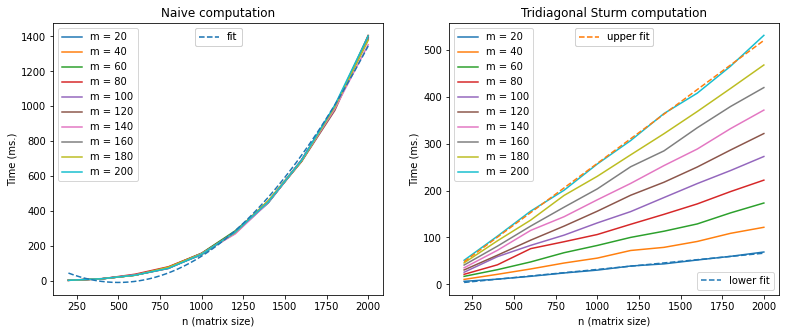

In [125]:
N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

gaussian_tridiagonal_sim(N_list=N, bins_list=M, nreps=50)

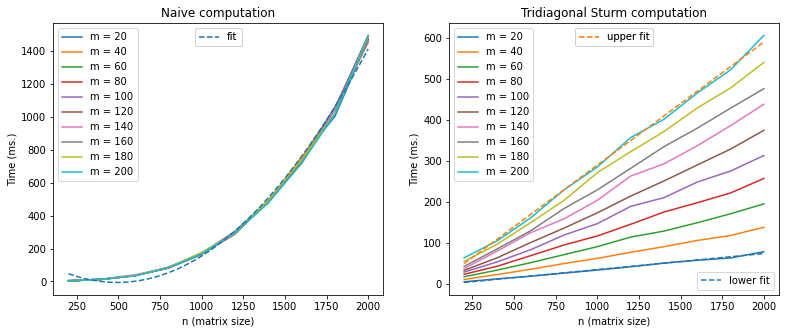

In [118]:
N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

wishart_tridiagonal_sim(N_list=N, bins_list=M, nreps=30)

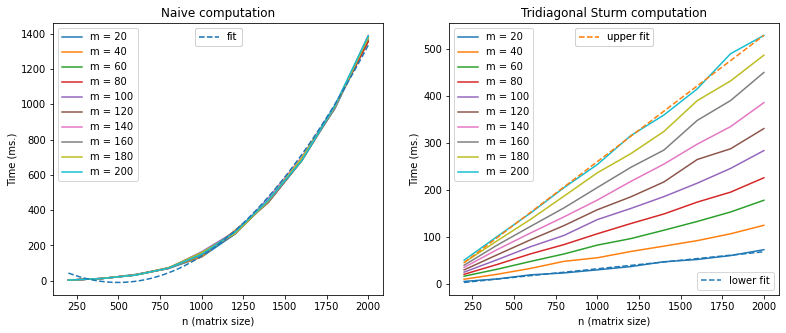

In [128]:
N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

wishart_tridiagonal_sim(N_list=N, bins_list=M, nreps=30)